# The future of ML (Americans vs Indians)

Since I started Kaggle competitions, I had a cute question. I called it beginner's curiosity.   

**"Have you ever thought which countries have the biggest impact on Kaggle competition?"**  

As everybody knows, the USA is an obvious IT powerhouse with Silicon Valley. It has the largest number of Kaggle Grandmaster Champions. There is no doubt that the USA has the most influence on Kaggle competitions.  

You can also see a lot of Indians on the participants list of it. India, known as the rising IT powerhouse, it actually interested in the Kaggle competitions. It can be confirmed easily by checking a percentage of respondents to the 《2020 Kaggle Machine Learning & df Science Survey》. The response rate for Indians is the highest about 29.2%(5,850 people). It is higher than the second-ranked country, and I will explain the details below.

Plus, a few years ago, every country emphasize the importance of Machine Learning. Because It can be used lots of fields in the world. I also wondered the future of ML, so I decided to look into the future of Machine Learning through responses from two leader countires.

**"Do you know the future of Machine Learning?"**

To sum up, I will compare the responses of American and Indian especially about Machine Learning in the order below.  


## Contents
1. Responses Rate by Country
2. Percentage by age & gender
3. Level of Education
4. Development Environment
5. Basic of Machine Learning
6. CV vs NLP
7. Machine Learning in the business

## Library & Data Import

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
plt.rcParams['figure.dpi'] = 200
from matplotlib import style
style.use('fivethirtyeight')
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("husl", 9)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import zipfile
DATA_IN_PATH = './data/'
file_list = ['kaggle-survey-2020.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [2]:
pd.set_option('mode.chained_assignment', None)
survey = pd.read_csv('./data/kaggle_survey_2020_responses.csv', skiprows=1)
question = survey.iloc[0,:].T
full_df = survey.iloc[1:,:]

full_df[full_df.columns[3]].replace({'United States of America':'USA',
                                     'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

In [3]:
question.head()

Duration (in seconds)                                                                                                         1838
What is your age (# years)?                                                                                                  35-39
What is your gender? - Selected Choice                                                                                         Man
In which country do you currently reside?                                                                                 Colombia
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?    Doctoral degree
Name: 0, dtype: object

In [4]:
full_df.head()

Duration (in seconds) What is your age (# years)?  \
1                 289287                       30-34   
2                    860                       35-39   
3                    507                       30-34   
4                     78                       30-34   
5                    401                       30-34   

  What is your gender? - Selected Choice  \
1                                    Man   
2                                    Man   
3                                    Man   
4                                    Man   
5                                    Man   

  In which country do you currently reside?  \
1                                       USA   
2                                 Argentina   
3                                       USA   
4                                     Japan   
5                                     India   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                    Master’s degree                                                                
2                                  Bachelor’s degree                                                                
3                                    Master’s degree                                                                
4                                    Master’s degree                                                                
5                                  Bachelor’s degree                                                                

  Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                      Data Engineer                                                        
2                                  Software Engineer                                                        
3                                     Data Scientist                                                        
4                                  Software Engineer                                                        
5                                       Data Analyst                                                        

  For how many years have you been writing code and/or programming?  \
1                                         5-10 years                  
2                                        10-20 years                  
3                                         5-10 years                  
4                                          3-5 years                  
5                                          < 1 years                  

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python  \
1                                             Python                                                             
2                                                NaN                                                             
3                                             Python                                                             
4                                             Python                                                             
5                                             Python                                                             

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R  \
1                                                  R                                                        
2                                                NaN                                                        
3                                                NaN                                                        
4                                                NaN                                                        
5                                                  R                                                   

## 1. Responses Rate by Country

In [5]:
full_pie = px.pie(full_df, full_df.columns[3],
                 title='Survey Responses Rate by Country',
                 template='seaborn', hole=0.5)
full_pie.update_traces(textposition='inside', textinfo='percent+label')
full_pie.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
full_pie.show()

The response rate for Indians is the highest about 29.2%(5,850 people). It is about 2.6 times higher than the second-ranked country, the USA. I just use Americans and Indians responses for this report, so I extract data by only 2 countries.

## Preprocessing

In [6]:
def assignCountry(country):
    if country == 'India':
        return 'India' 
    elif country == 'USA':
        return 'USA'
    else:
        return 'Others'

full_df['country_agg'] = full_df[full_df.columns[3]].apply(assignCountry)

In [7]:
full_df['country_agg'].unique()

array(['USA', 'Others', 'India'], dtype=object)

In [8]:
full_df2 = full_df.copy()
full_df2.rename(columns = {'In which country do you currently reside?':'Country',
                          'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'Your current job'},inplace=True)

df = full_df2[full_df2['country_agg'] != "Others"].reset_index(drop=True)
df.head()

Duration (in seconds) What is your age (# years)?  \
0                 289287                       30-34   
1                    507                       30-34   
2                    401                       30-34   
3                   7469                       18-21   
4                    742                       35-39   

  What is your gender? - Selected Choice Country  \
0                                    Man     USA   
1                                    Man     USA   
2                                    Man   India   
3                                    Man   India   
4                                    Man     USA   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                    Master’s degree                                                                
1                                    Master’s degree                                                                
2                                  Bachelor’s degree                                                                
3                                  Bachelor’s degree                                                                
4                                    Doctoral degree                                                                

     Your current job  \
0       Data Engineer   
1      Data Scientist   
2        Data Analyst   
3             Student   
4  Research Scientist   

  For how many years have you been writing code and/or programming?  \
0                                         5-10 years                  
1                                         5-10 years                  
2                                          < 1 years                  
3                                          1-2 years                  
4                                          1-2 years                  

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python  \
0                                             Python                                                             
1                                             Python                                                             
2                                             Python                                                             
3                                             Python                                                             
4                                                NaN                                                             

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R  \
0                                                  R                                                        
1                                                NaN                                                        
2                                                  R                                                        
3                                                  R                                                        
4                                                  R                                                        

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL  \
0                                                SQL                                                          
1                                                SQL                                                          
2                                                NaN                                                          
3                                                SQL                                                          
4                                                NaN                                                          

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  In

To organize the df neatly, I preprocesse a gender column. Only female and male remain. (146 responses will be deleted)

In [9]:
df = df[(df[df.columns[2]]=='Man')|(df[df.columns[2]]=='Woman')]
df = df.iloc[1:,:]
df.reset_index(drop=True, inplace=True)
df.shape

(7942, 356)

In [10]:
print("- Valid American Response: ",len(df[df['Country']=='USA']))
print("- Valid Indian Response: ",len(df[df['Country']=='India']))

- Valid American Response:  2162
- Valid Indian Response:  5780


In [11]:
survey1 = pd.read_csv('./data/kaggle_survey_2020_responses.csv')
                     
full_df3 = survey1.iloc[1:,:]
full_df3[full_df3.columns[3]].replace({'United States of America':'USA',
                                         'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

df1 = full_df3[(full_df3['Q3']=='India')|(full_df3['Q3']=='USA')]
df1 = df1.iloc[1:,:]
df1.reset_index(drop=True, inplace=True)

df1 = df1[(df1['Q2']=='Man')|(df1['Q2']=='Woman')]
df1 = df1.iloc[1:,:]
df1.reset_index(drop=True, inplace=True)

C:\Users\naeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



In [12]:
# Extract data by country
India = df1[df1['Q3']=='India']
India = India.iloc[1:,:]
India.reset_index(drop=True, inplace=True)

USA = df1[df1['Q3']=='USA']
USA = USA.iloc[1:,:]
USA.reset_index(drop=True, inplace=True)

I also made each data set('USA', 'India') to make some pie graphs.

## 2. Percentage by age & gender

To see their interest in coding, let's look at age and gender data.

Text(0.5, 1.0, 'Age Distribution')

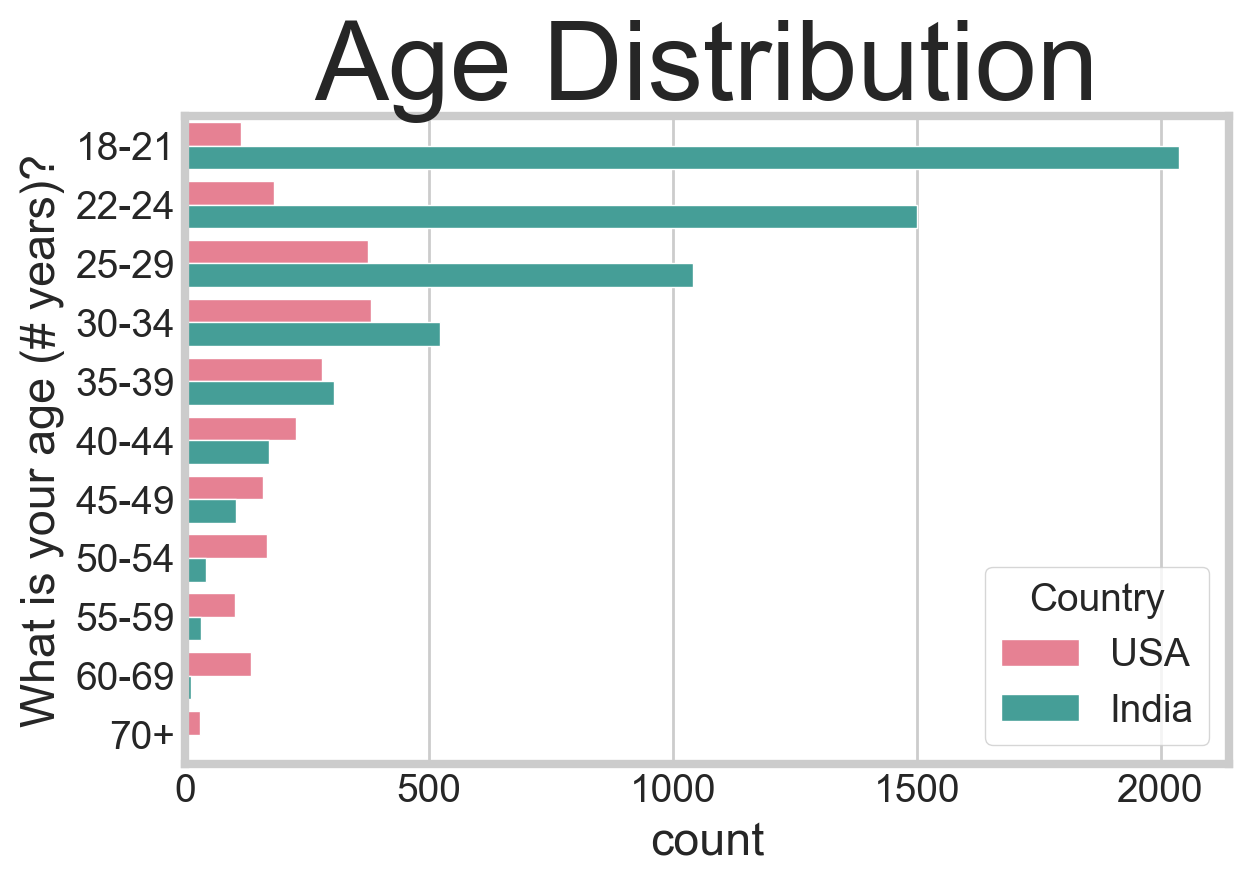

In [13]:
sns.countplot(y = df.columns[1], hue = df.columns[3], data = df, palette = "husl",
              order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'])
plt.title('Age Distribution', fontsize=40)

You can notice easily in the USA, distribution of age group is more regular than India. It represents the cording fever especially among young Indian. It can be interpreted India is a country which has a craze for coding.

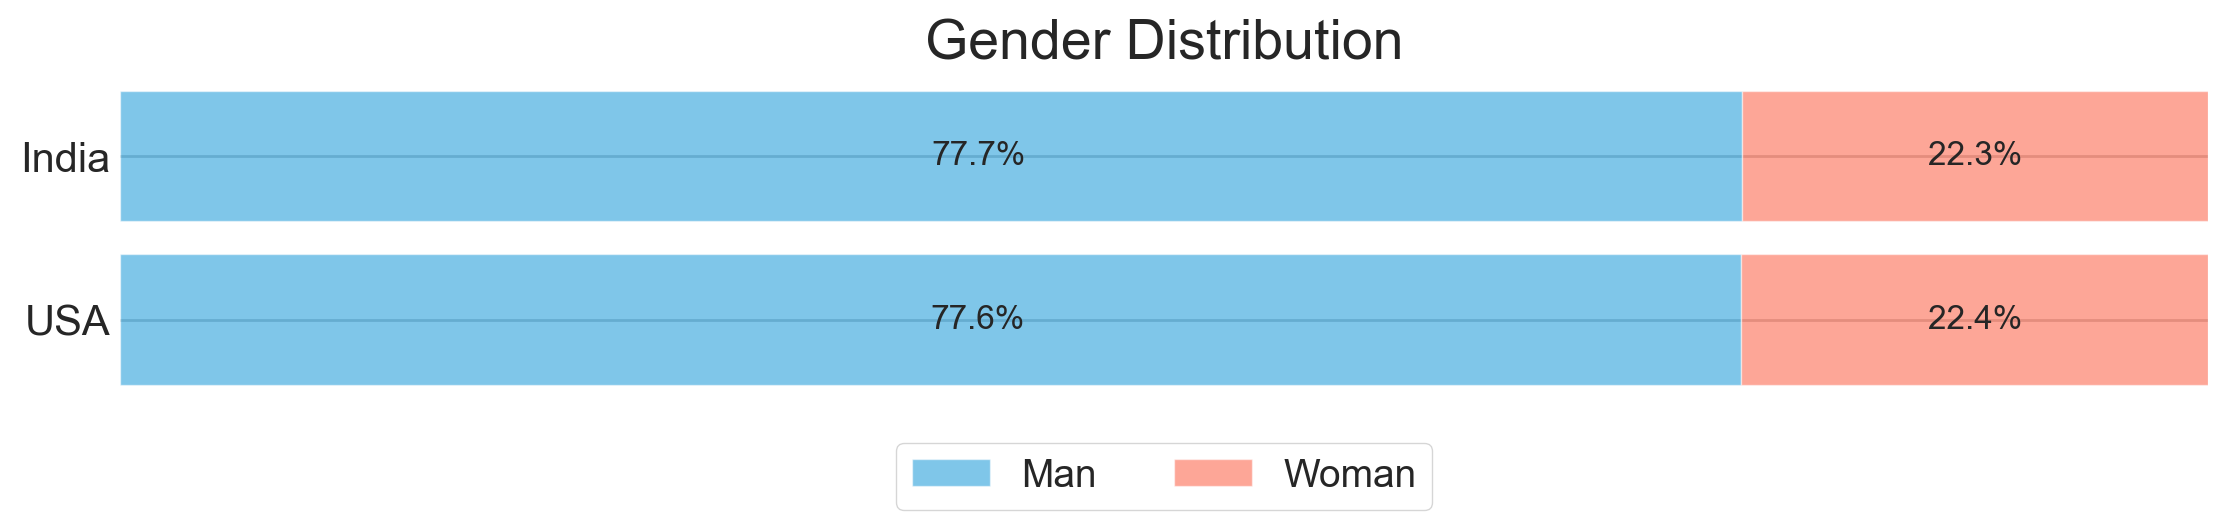

In [14]:
q3_order = df1['Q3'].value_counts()[:11].index
df1_q2q3 = df1[['Q2','Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
df1_q2q3['sum'] = df1_q2q3.sum(axis=1)
df1_q2q3_ratio = (df1_q2q3.T / df1_q2q3['sum']).T[['Man','Woman']][::-1]

fig, ax = plt.subplots(1,1,figsize=(12, 2))

ax.barh(df1_q2q3_ratio.index, df1_q2q3_ratio['Man'], alpha=0.5, label='Man')
ax.barh(df1_q2q3_ratio.index, df1_q2q3_ratio['Woman'],
        left=df1_q2q3_ratio['Man'], alpha=0.5, label='Woman')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(df1_q2q3_ratio.index, fontsize=15)

# male percentage
for i in df1_q2q3_ratio.index:
    ax.annotate(f"{df1_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(df1_q2q3_ratio['Man'][i]/2, i), fontsize=12, va='center')

for i in df1_q2q3_ratio.index:
    ax.annotate(f"{df1_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(df1_q2q3_ratio['Man'][i]+df1_q2q3_ratio['Woman'][i]/2, i),
                   va='center', ha='center', fontsize=12)
    
plt.title('Gender Distribution', fontsize=20)   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.40))
plt.show()

The gender ratio of two countires are alike. In both countries, male respondents are about 3.4 times more than female respondents.

## 3. Education & Job
Then I check Education level and their current job.

### 3-1. Level of Education
Please notice that I can confirm just their degree level, not major. However, many respondents study above bachelor's degree, so I think it is okay to assume that it is a coding-related major.

Text(0.5, 1.0, 'Education Level')

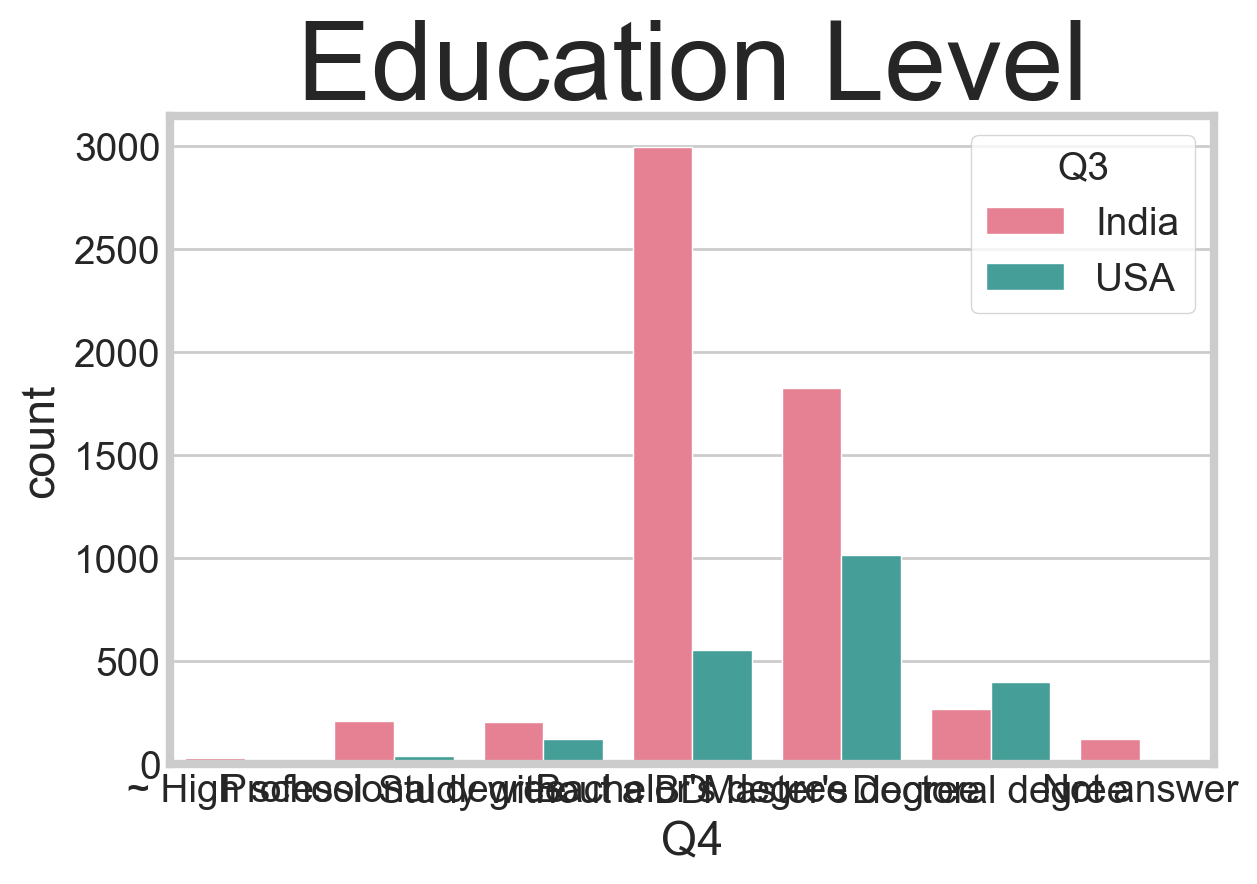

In [15]:
df1['Q4'] = df1['Q4'].str.replace("[^A-Za-z0-9-\s]+", "")
df1['Q4'].replace({'No formal education past high school':'~ High school',
                   'I prefer not to answer':'Not answer',
                   'Some collegeuniversity study without earning a bachelors degree':'Study without a BD',
                   'Masters degree':"Master's degree",
                   'Bachelors degree':"Bachelor's degree",
                   ' High school':'~ High school'}, inplace=True)

sns.countplot(x = df1.columns[4], hue = df1.columns[3], data = df1, palette = "husl",
             order = ['~ High school', 'Professional degree', 'Study without a BD', "Bachelor's degree","Master's degree",'Doctoral degree', 'Not answer'])
plt.title('Education Level', fontsize=40)

In the case of master and doctor, the percentage of Americans(0.46%, 0.18%) is higher than Indian(0.31%, 0.04%). Lots of Indians have bachelor degree and I also see 0.01% of Indian has progessional degree. It shows the USA already has many IT technician with highly educated, and India's level of education is more higher.

### 3-2. Current Job

Text(0.5, 1.0, 'Current Job')

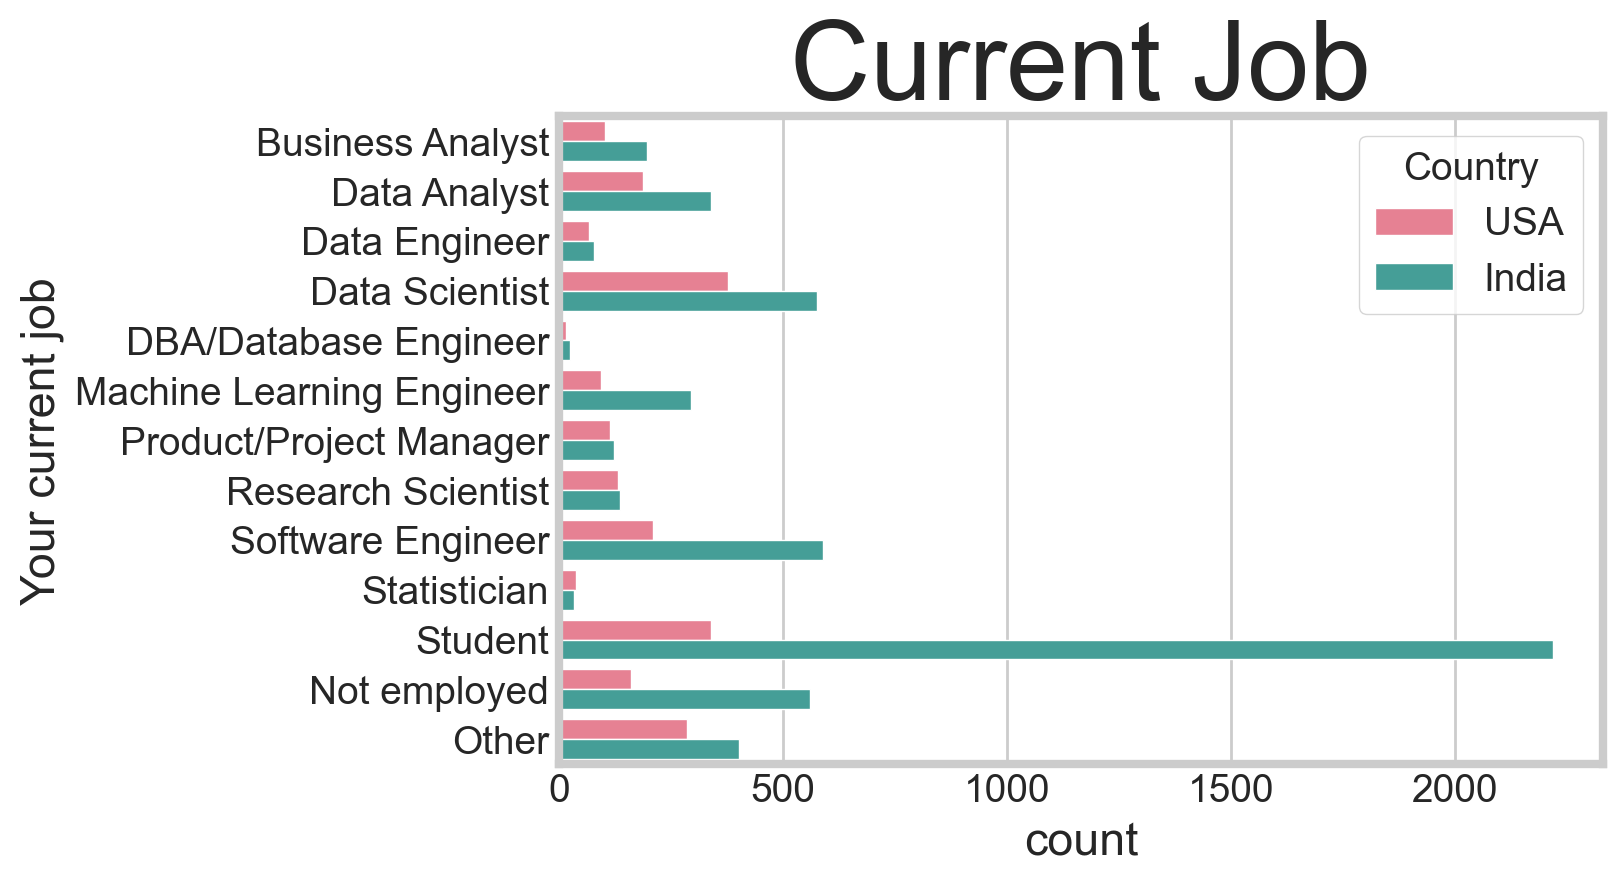

In [16]:
df[df.columns[5]].replace({'Currently not employed':'Not employed'},inplace=True)

sns.countplot(y = df.columns[5], hue = df.columns[3], data = df, palette = "husl",
             order = ['Business Analyst','Data Analyst','Data Engineer','Data Scientist',
                      'DBA/Database Engineer','Machine Learning Engineer','Product/Project Manager',
                      'Research Scientist','Software Engineer','Statistician','Student','Not employed','Other'])
plt.title('Current Job', fontsize=40)

What could I write about it????????????????????

## 4. Development Environment

### 4-1. Period of coding

Text(0.5, 1.0, 'Period of Coding')

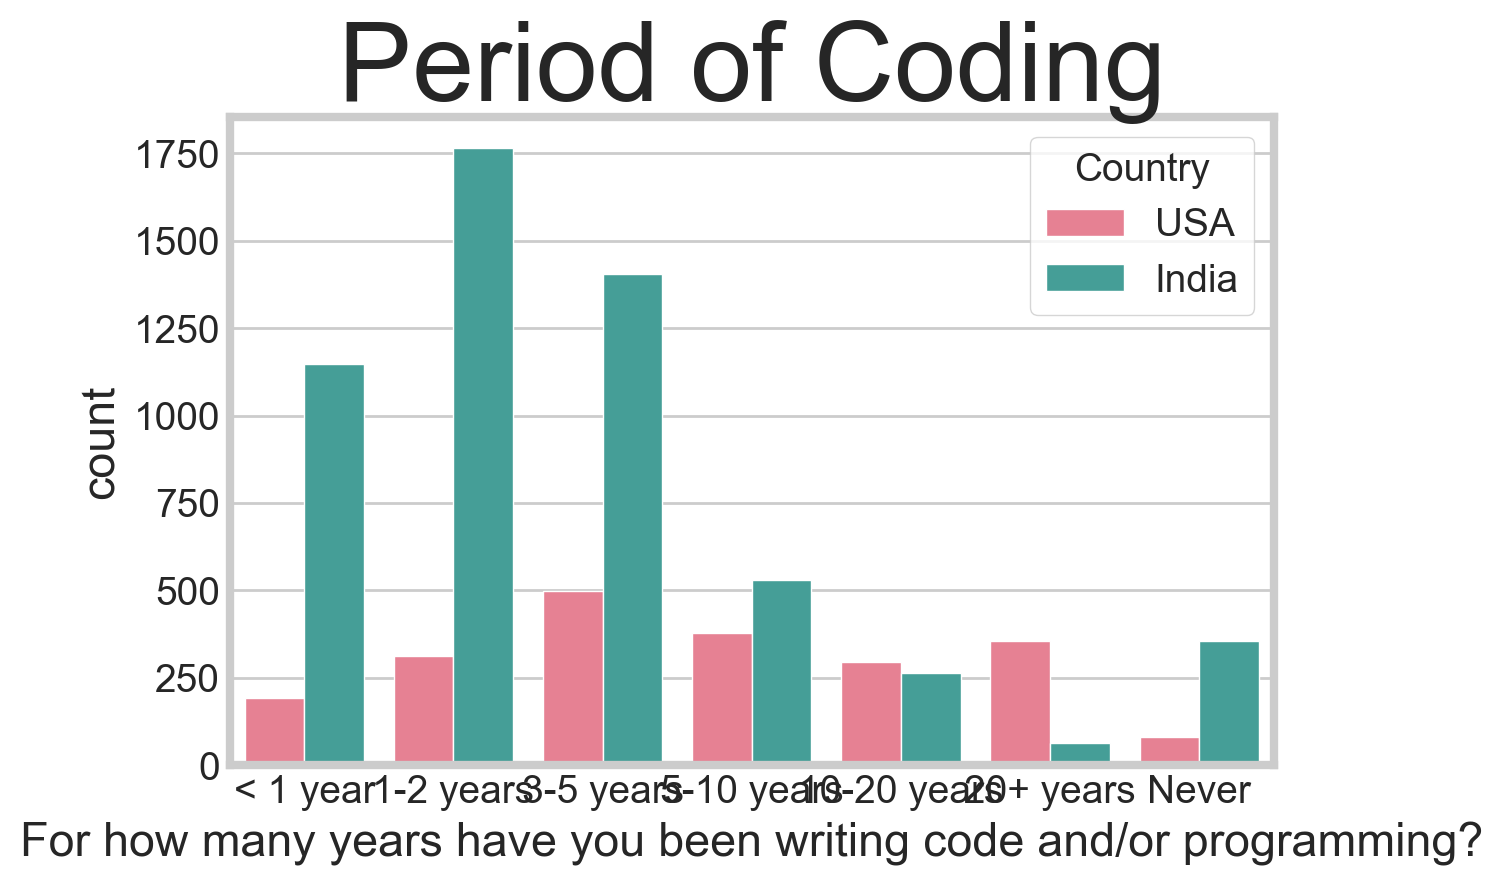

In [17]:
df[df.columns[6]].replace({'I have never written code':'Never',
                           '< 1 years':'< 1 year'}, inplace=True)

sns.countplot(x = df.columns[6], hue = df.columns[3], data = df, palette = "husl",
              order = ['< 1 year','1-2 years','3-5 years','5-10 years','10-20 years','20+ years','Never'])
plt.title('Period of Coding', fontsize=40)

### 4-2. Basic programming language (multiple)

In [18]:
# Preprocess Basic programming language data
USA7 = (USA['Q7_Part_1'], USA['Q7_Part_2'], USA['Q7_Part_3'], USA['Q7_Part_4'],
        USA['Q7_Part_5'], USA['Q7_Part_6'], USA['Q7_Part_7'], USA['Q7_Part_8'],
        USA['Q7_OTHER'])
USA7 = pd.concat(USA7)

India7 = (India['Q7_Part_1'], India['Q7_Part_2'], India['Q7_Part_3'], India['Q7_Part_4'],
          India['Q7_Part_5'], India['Q7_Part_6'], India['Q7_Part_7'], India['Q7_Part_8'],
          India['Q7_OTHER'])
India7 = pd.concat(India7)

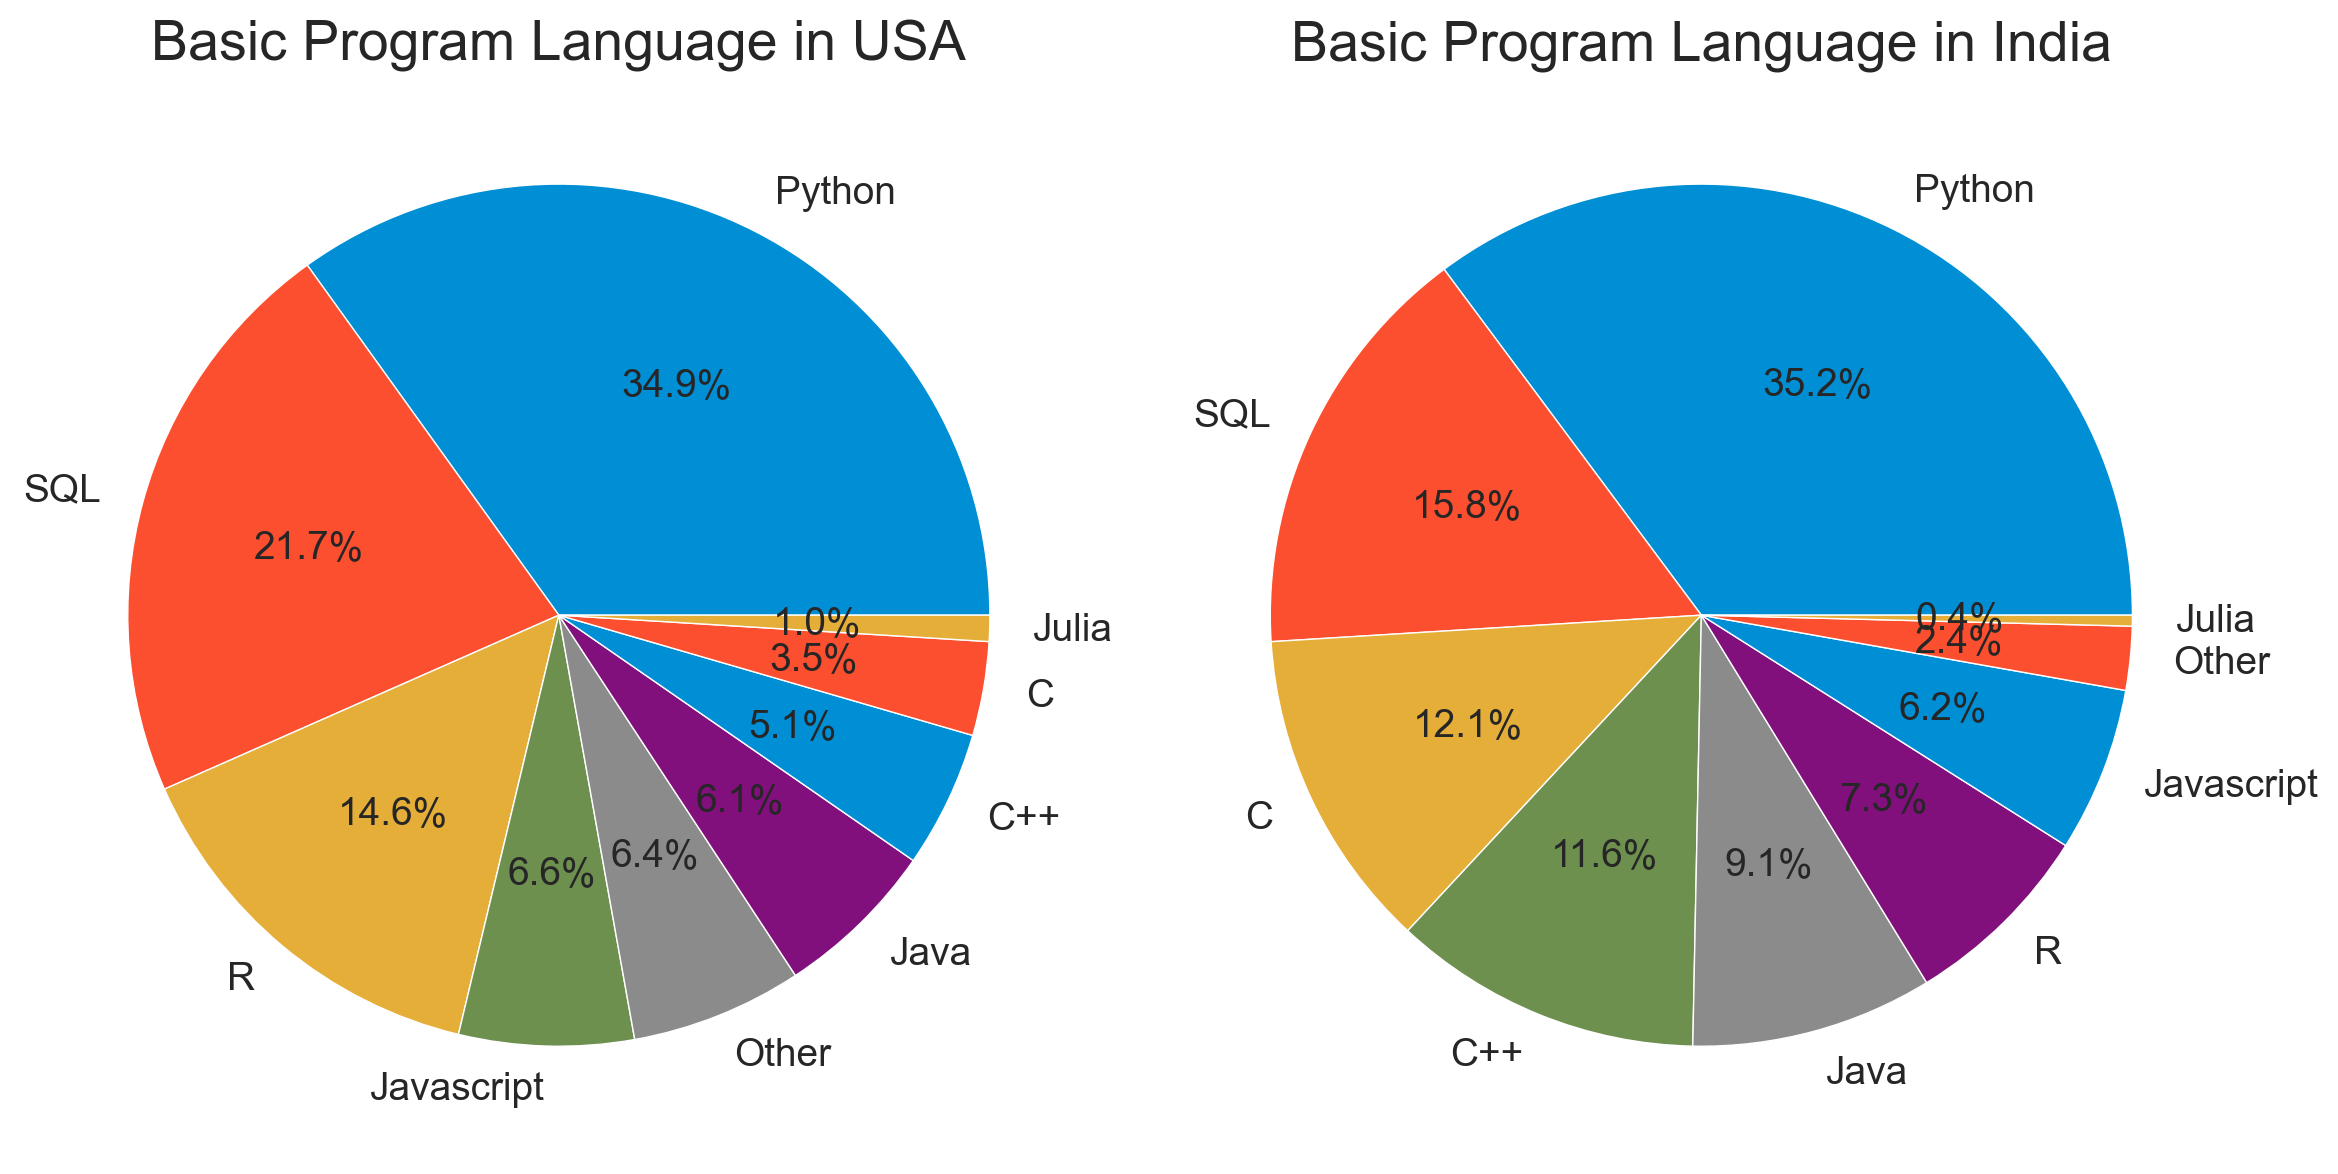

In [19]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA7.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
               'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
               'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
               'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
               'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)
               
India7.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
                 'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
                 'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
                 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
                 'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)   
    
USA7.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Basic Program Language in USA', fontsize=20)
ax[0].set_ylabel('')

India7.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Basic Program Language in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 4-3. Recommend programming language for starter

Text(0.5, 1.0, 'Recommend for starter')

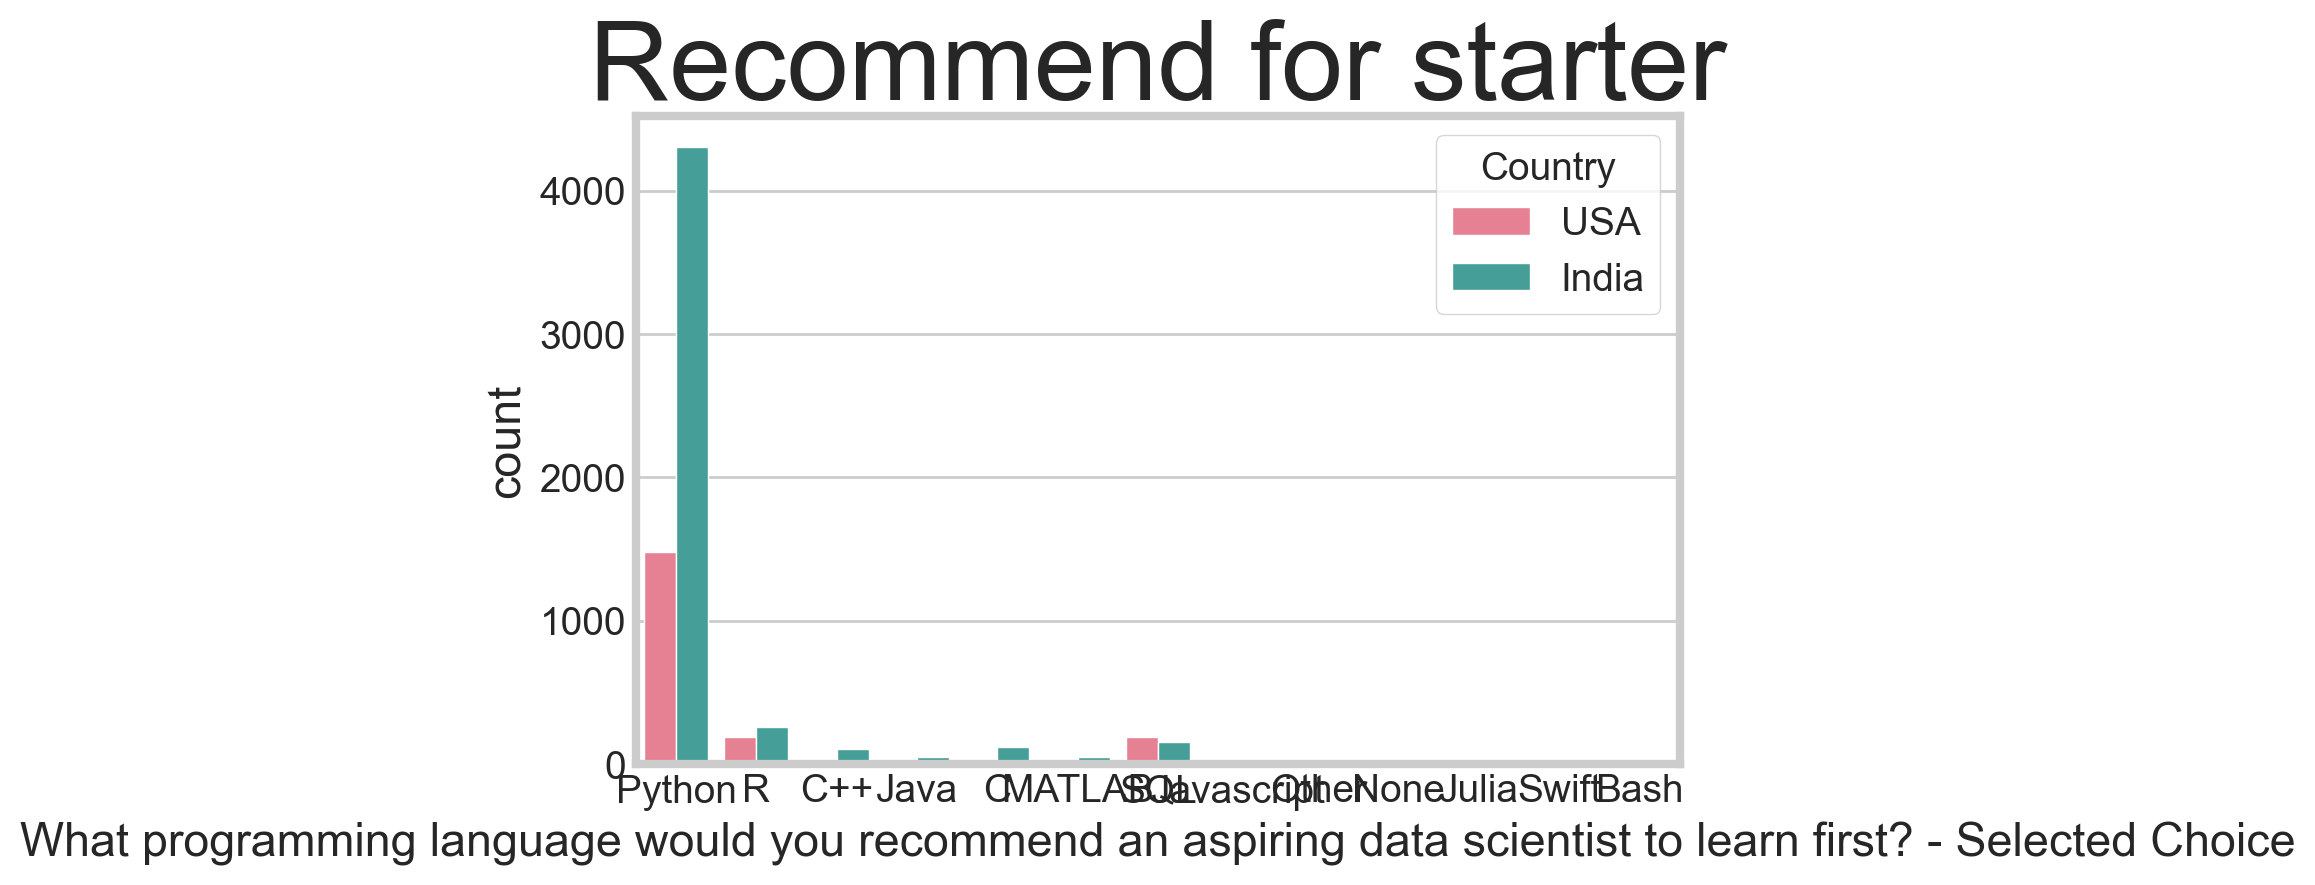

In [20]:
sns.countplot(x = df.columns[20], hue = df.columns[3], data = df, palette = "husl")
plt.title('Recommend for starter', fontsize=40)

## 5. Basic of Machine Learning
### 5-1. Period of Using Machine Learning

Text(0.5, 1.0, 'Period of Using Machine Learning')

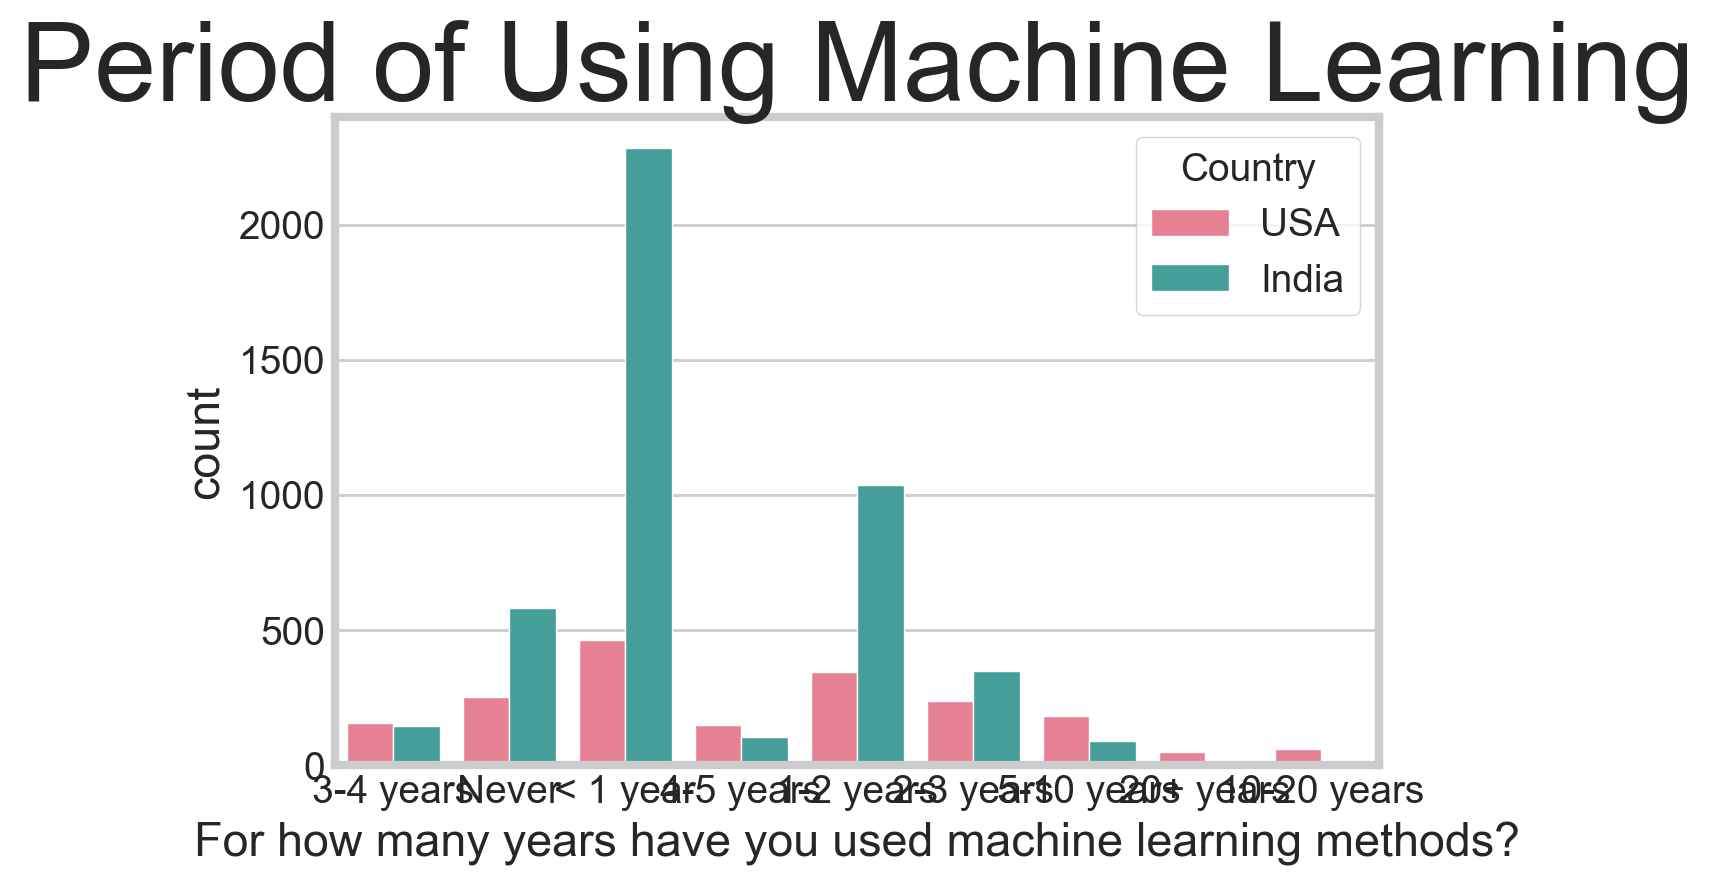

In [21]:
df[df.columns[65]].replace({'Under 1 year':'< 1 year',
                            '20 or more years':'20+ years',
                            'I do not use machine learning methods':'Never'}, inplace=True)

sns.countplot(x = df.columns[65], hue = df.columns[3], data = df, palette = "husl")
plt.title('Period of Using Machine Learning', fontsize=40)

### 5-2. Using machine learning framework

In [22]:
# Preprocess machine learning framework data
USA16 = (USA['Q16_Part_1'], USA['Q16_Part_2'], USA['Q16_Part_3'], USA['Q16_Part_4'],
        USA['Q16_Part_5'], USA['Q16_Part_6'], USA['Q16_Part_7'], USA['Q16_Part_8'],
        USA['Q16_Part_9'], USA['Q16_Part_10'], USA['Q16_Part_11'], USA['Q16_Part_12'],
        USA['Q16_Part_13'], USA['Q16_Part_14'], USA['Q16_Part_15'], USA['Q16_OTHER'])
USA16 = pd.concat(USA16)

India16 = (India['Q16_Part_1'], India['Q16_Part_2'], India['Q16_Part_3'], India['Q16_Part_4'],
        India['Q16_Part_5'], India['Q16_Part_6'], India['Q16_Part_7'], India['Q16_Part_8'],
        India['Q16_Part_9'], India['Q16_Part_10'], India['Q16_Part_11'], India['Q16_Part_12'],
        India['Q16_Part_13'], India['Q16_Part_14'], India['Q16_Part_15'], India['Q16_OTHER'])
India16 = pd.concat(India16)

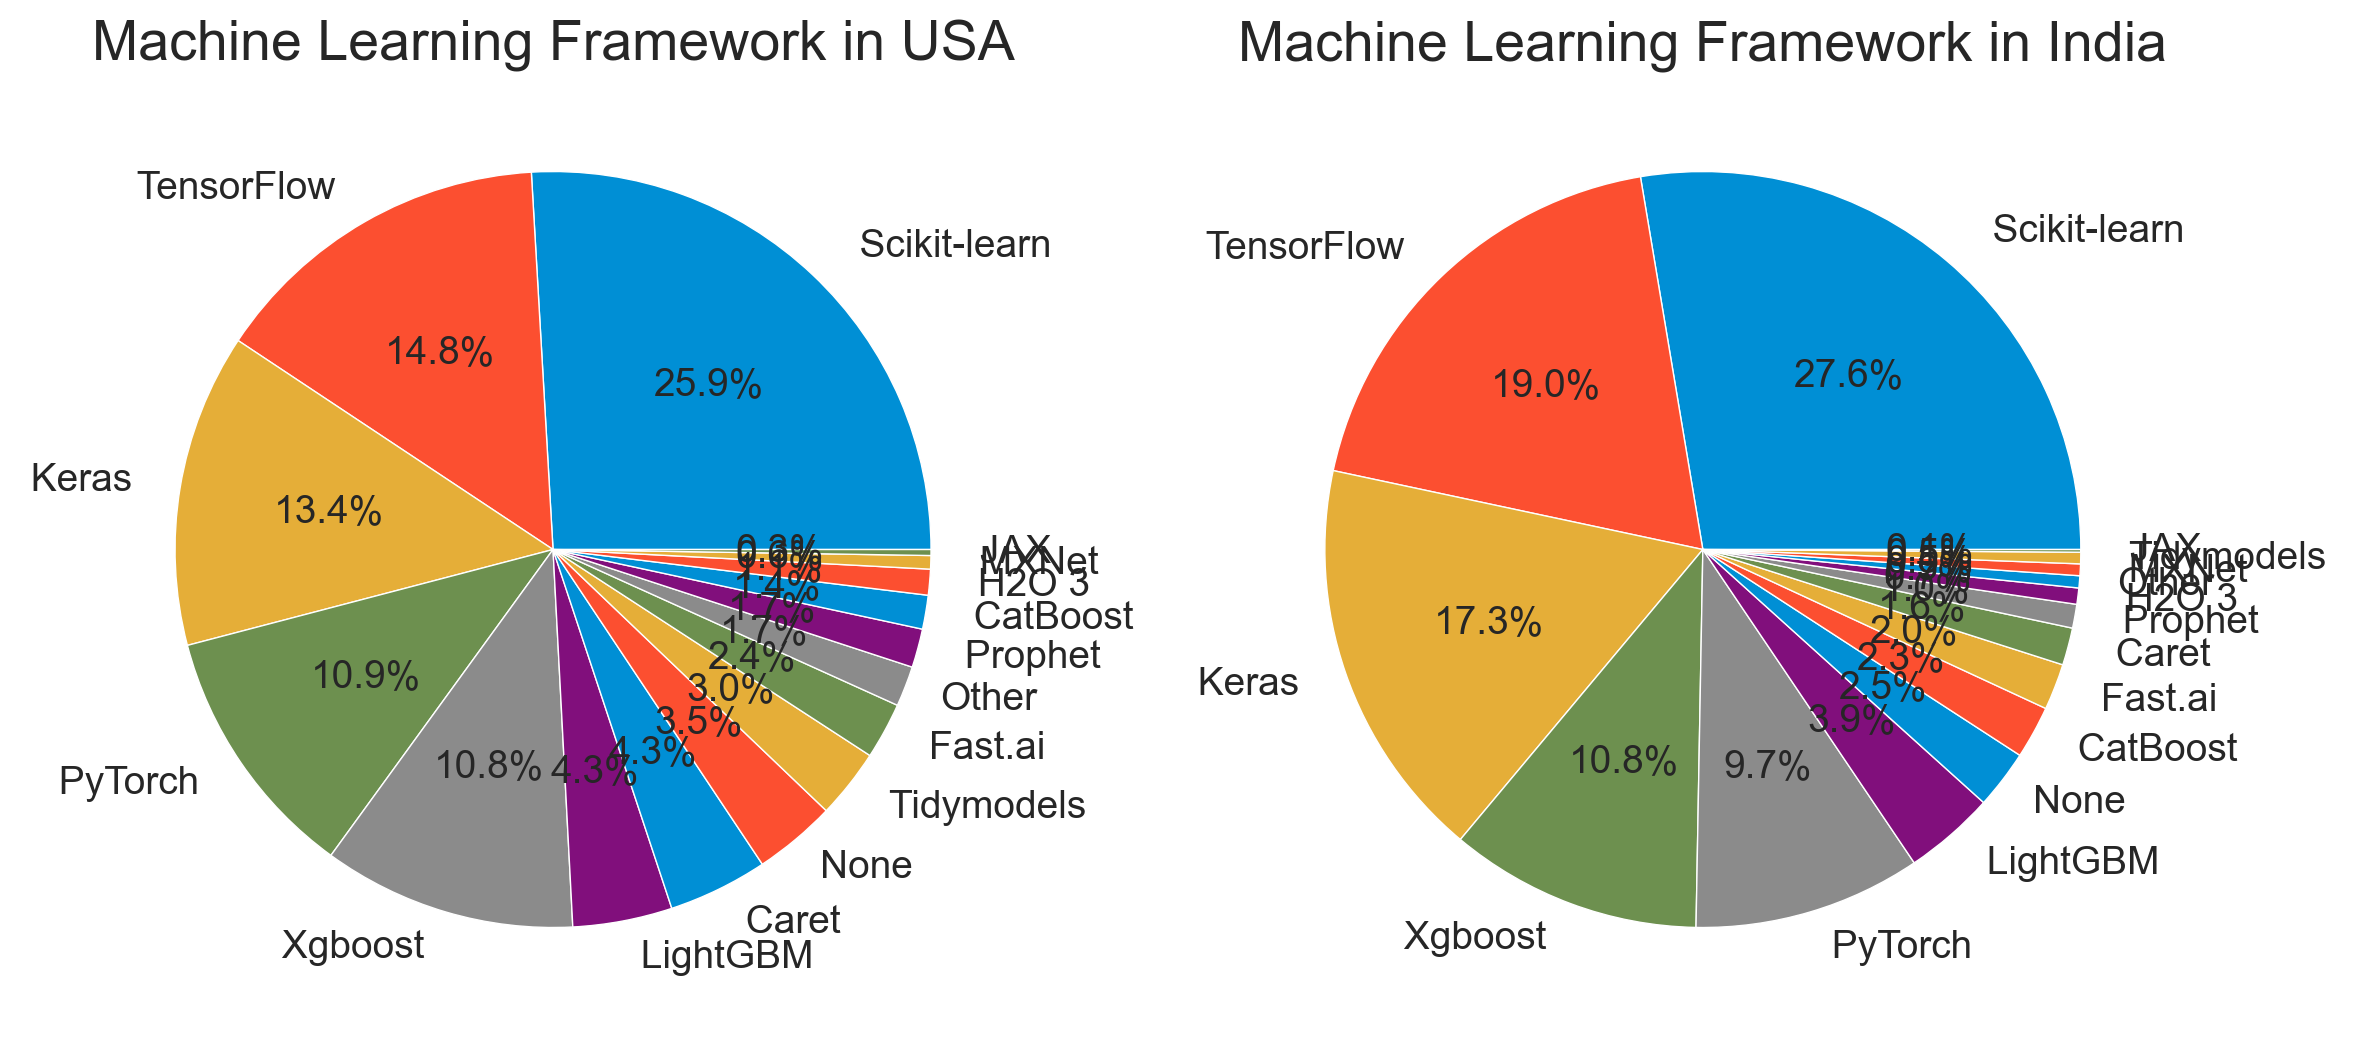

In [23]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))
    
USA16.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Machine Learning Framework in USA', fontsize=20)
ax[0].set_ylabel('')

India16.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Machine Learning Framework in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 5-3. Using machine learning algorithm

In [24]:
# Preprocess machine learning algorithm data
USA17 = (USA['Q17_Part_1'], USA['Q17_Part_2'], USA['Q17_Part_3'], USA['Q17_Part_4'],
        USA['Q17_Part_5'], USA['Q17_Part_6'], USA['Q17_Part_7'], USA['Q17_Part_8'],
        USA['Q17_Part_9'], USA['Q17_Part_10'], USA['Q17_Part_11'], USA['Q17_OTHER'])
USA17 = pd.concat(USA17)

India17 = (India['Q17_Part_1'], India['Q17_Part_2'], India['Q17_Part_3'], India['Q17_Part_4'],
        India['Q17_Part_5'], India['Q17_Part_6'], India['Q17_Part_7'], India['Q17_Part_8'],
        India['Q17_Part_9'], India['Q17_Part_10'], India['Q17_Part_11'], India['Q17_OTHER'])
India17 = pd.concat(India17)

In [25]:
USA17.unique()

array(['Linear or Logistic Regression', nan,
       'Decision Trees or Random Forests',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Evolutionary Approaches',
       'Dense Neural Networks (MLPs, etc)',
       'Convolutional Neural Networks', 'Generative Adversarial Networks',
       'Recurrent Neural Networks',
       'Transformer Networks (BERT, gpt-3, etc)', 'None', 'Other'],
      dtype=object)

<ipython-input-26-74a4e5cf8fbf>:11: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



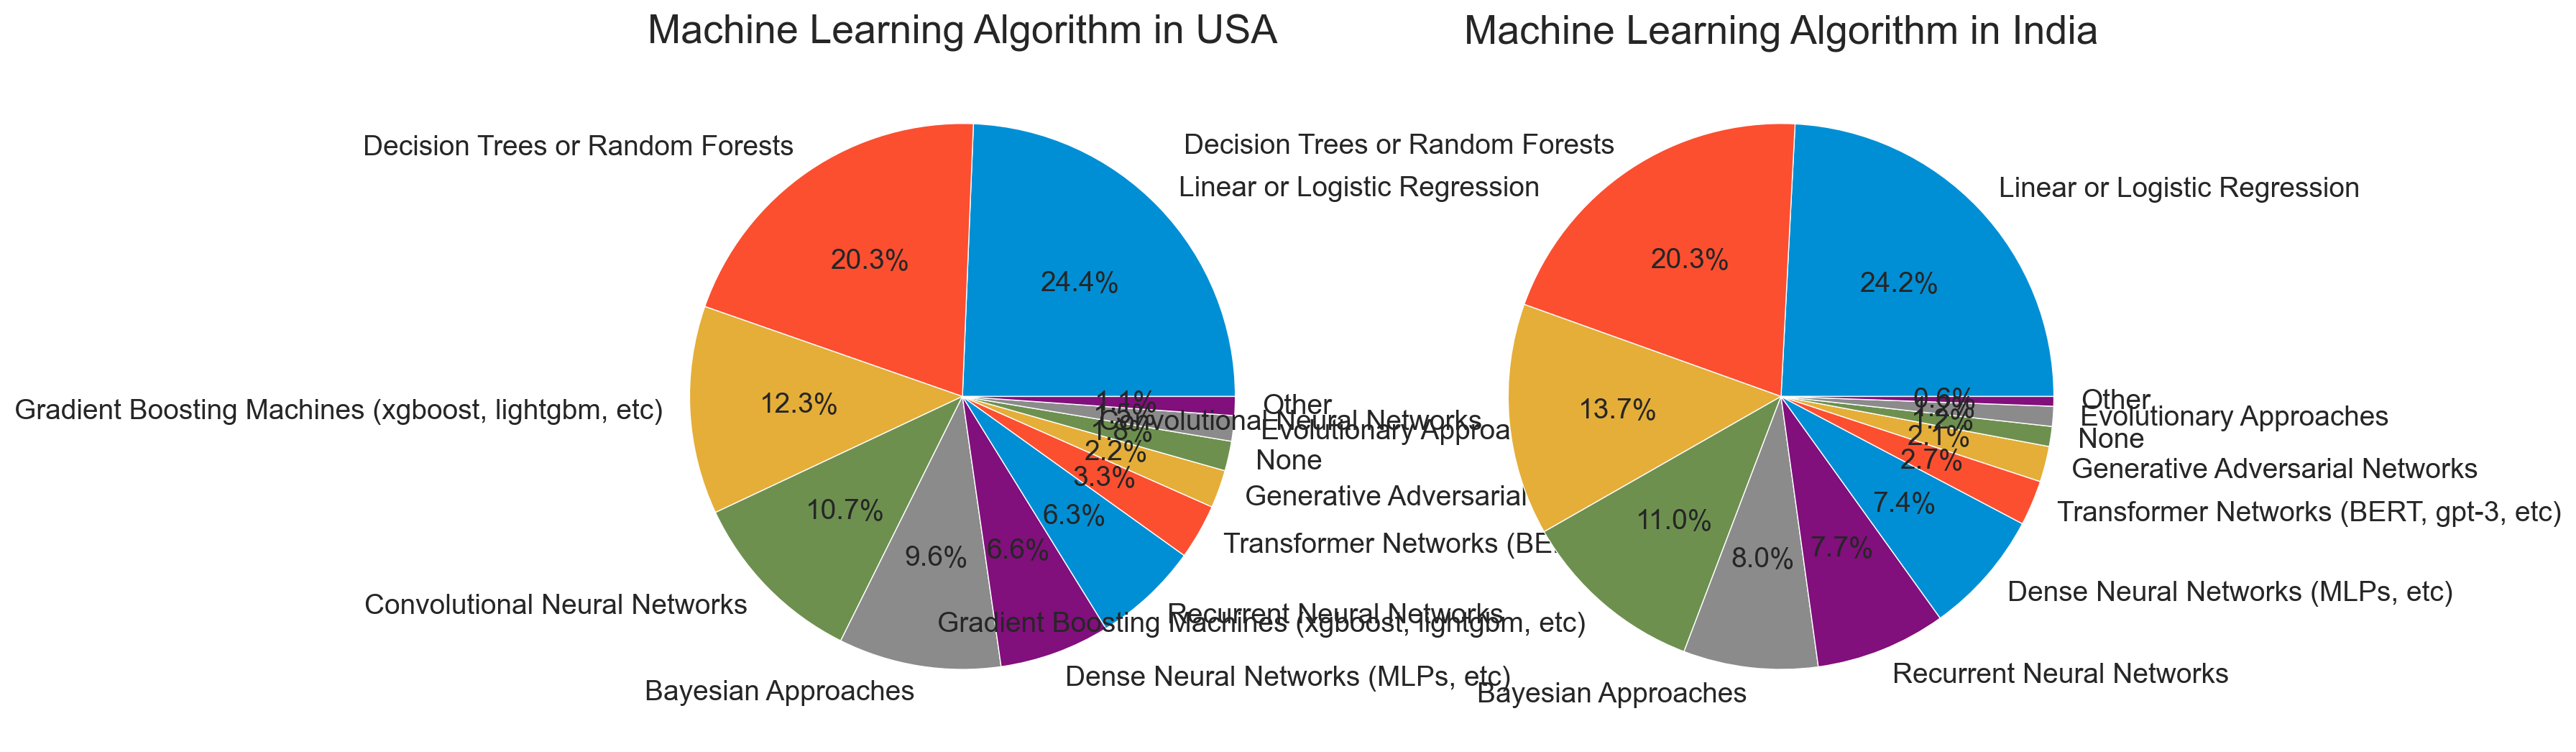

In [26]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))
    
USA17.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Machine Learning Algorithm in USA', fontsize=20)
ax[0].set_ylabel('')

India17.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Machine Learning Algorithm in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 6. CV vs NLP

In [27]:
# Preprocess CV data
USA18 = (USA['Q18_Part_1'], USA['Q18_Part_2'], USA['Q18_Part_3'],
                  USA['Q18_Part_4'], USA['Q18_Part_5'], USA['Q18_Part_6'],
                  USA['Q18_OTHER'])
USA18 = pd.concat(USA18)

India18 = (India['Q18_Part_1'], India['Q18_Part_2'], India['Q18_Part_3'],
                  India['Q18_Part_4'], India['Q18_Part_5'], India['Q18_Part_6'],
                  India['Q18_OTHER'])
India18 = pd.concat(India18)

# Preprocess NLP data
USA19 = (USA['Q19_Part_1'], USA['Q19_Part_2'], USA['Q19_Part_3'],
                  USA['Q19_Part_4'], USA['Q19_Part_5'], USA['Q19_OTHER'])
USA19 = pd.concat(USA19)

India19 = (India['Q19_Part_1'], India['Q19_Part_2'], India['Q19_Part_3'],
                  India['Q19_Part_4'], India['Q19_Part_5'], India['Q19_OTHER'])
India19 = pd.concat(India19)

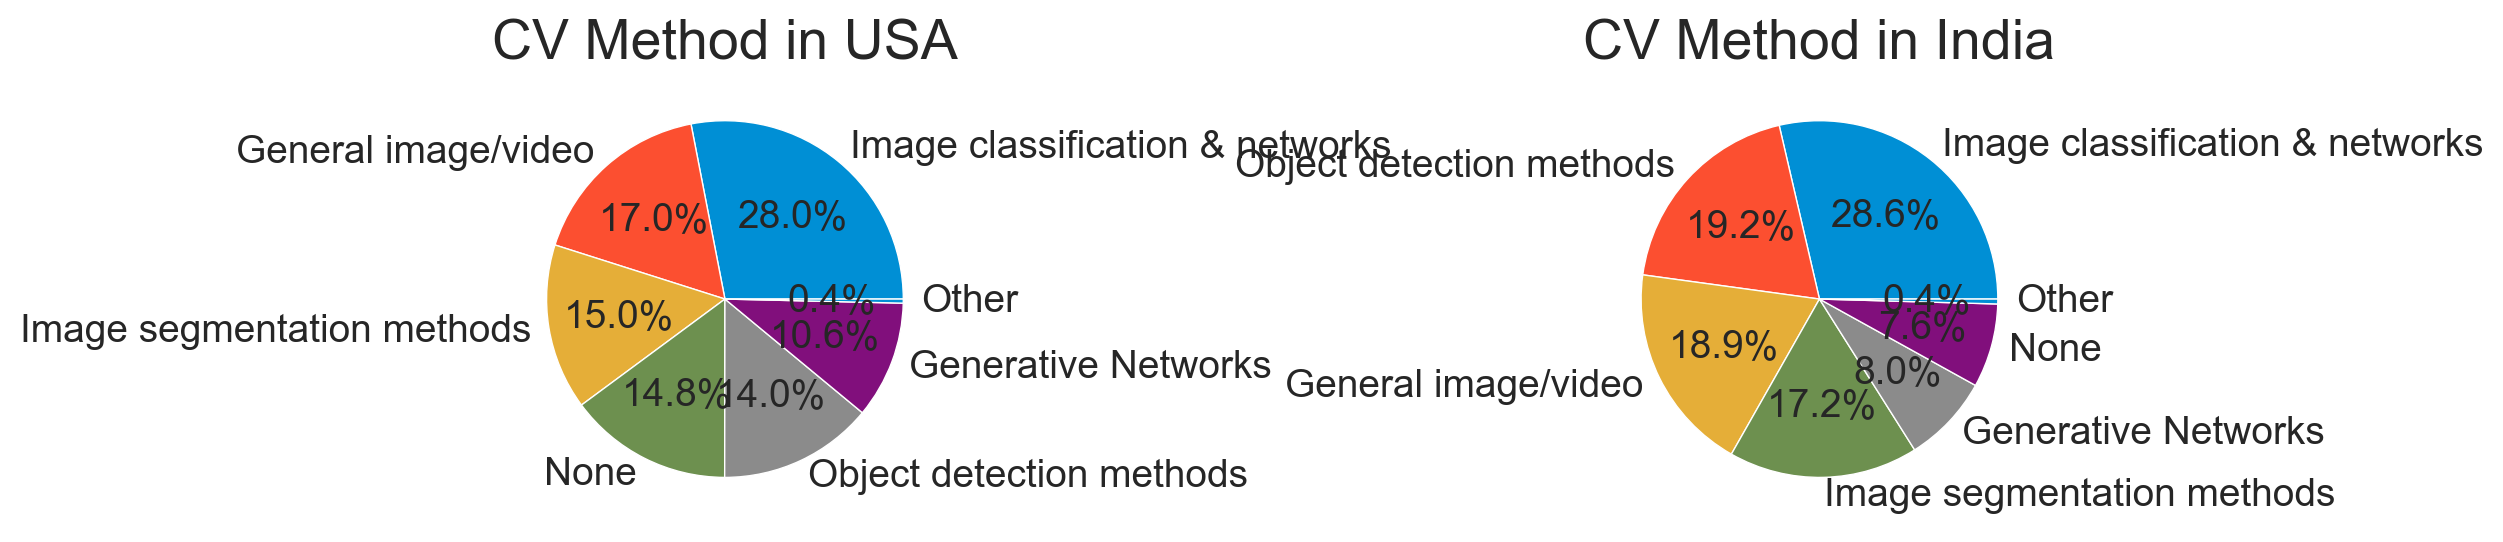

In [28]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA18.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
               'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
               'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
               'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
               'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)
               
India18.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
                 'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
                 'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
                 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
                 'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)   
    
USA18.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('CV Method in USA', fontsize=20)
ax[0].set_ylabel('')

India18.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('CV Method in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

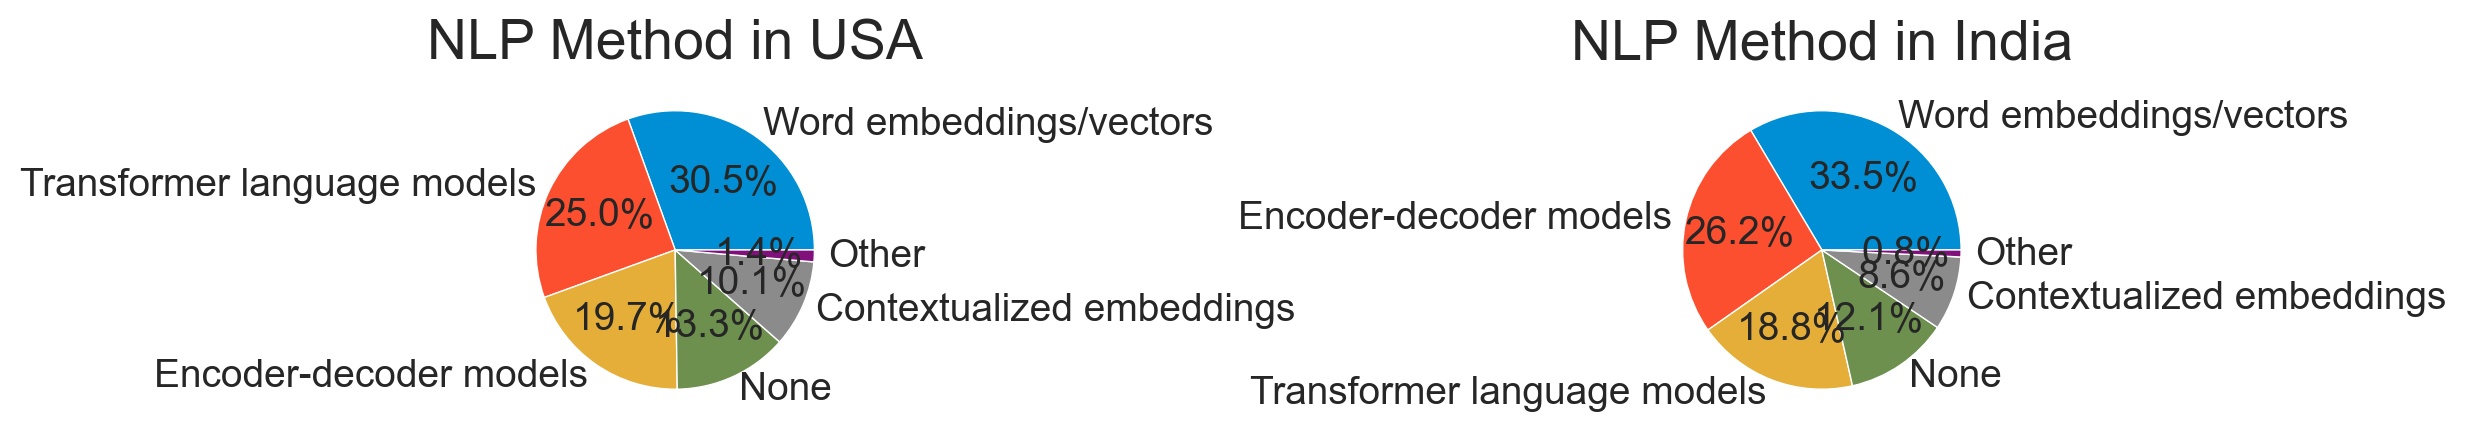

In [29]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA19.replace({'Word embeddings/vectors (GLoVe, fastText, word2vec)':'Word embeddings/vectors',
               'Encoder-decorder models (seq2seq, vanilla transformers)':'Encoder-decoder models',
               'Contextualized embeddings (ELMo, CoVe)':'Contextualized embeddings',
               'Transformer language models (GPT-3, BERT, XLnet, etc)':'Transformer language models'}, inplace=True)

India19.replace({'Word embeddings/vectors (GLoVe, fastText, word2vec)':'Word embeddings/vectors',
                 'Encoder-decorder models (seq2seq, vanilla transformers)':'Encoder-decoder models',
                 'Contextualized embeddings (ELMo, CoVe)':'Contextualized embeddings',
                 'Transformer language models (GPT-3, BERT, XLnet, etc)':'Transformer language models'}, inplace=True)

USA19.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('NLP Method in USA', fontsize=20)
ax[0].set_ylabel('')

India19.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('NLP Method in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 7. Machine Learning in the business

Text(0.5, 1.0, 'Using ML in the business')

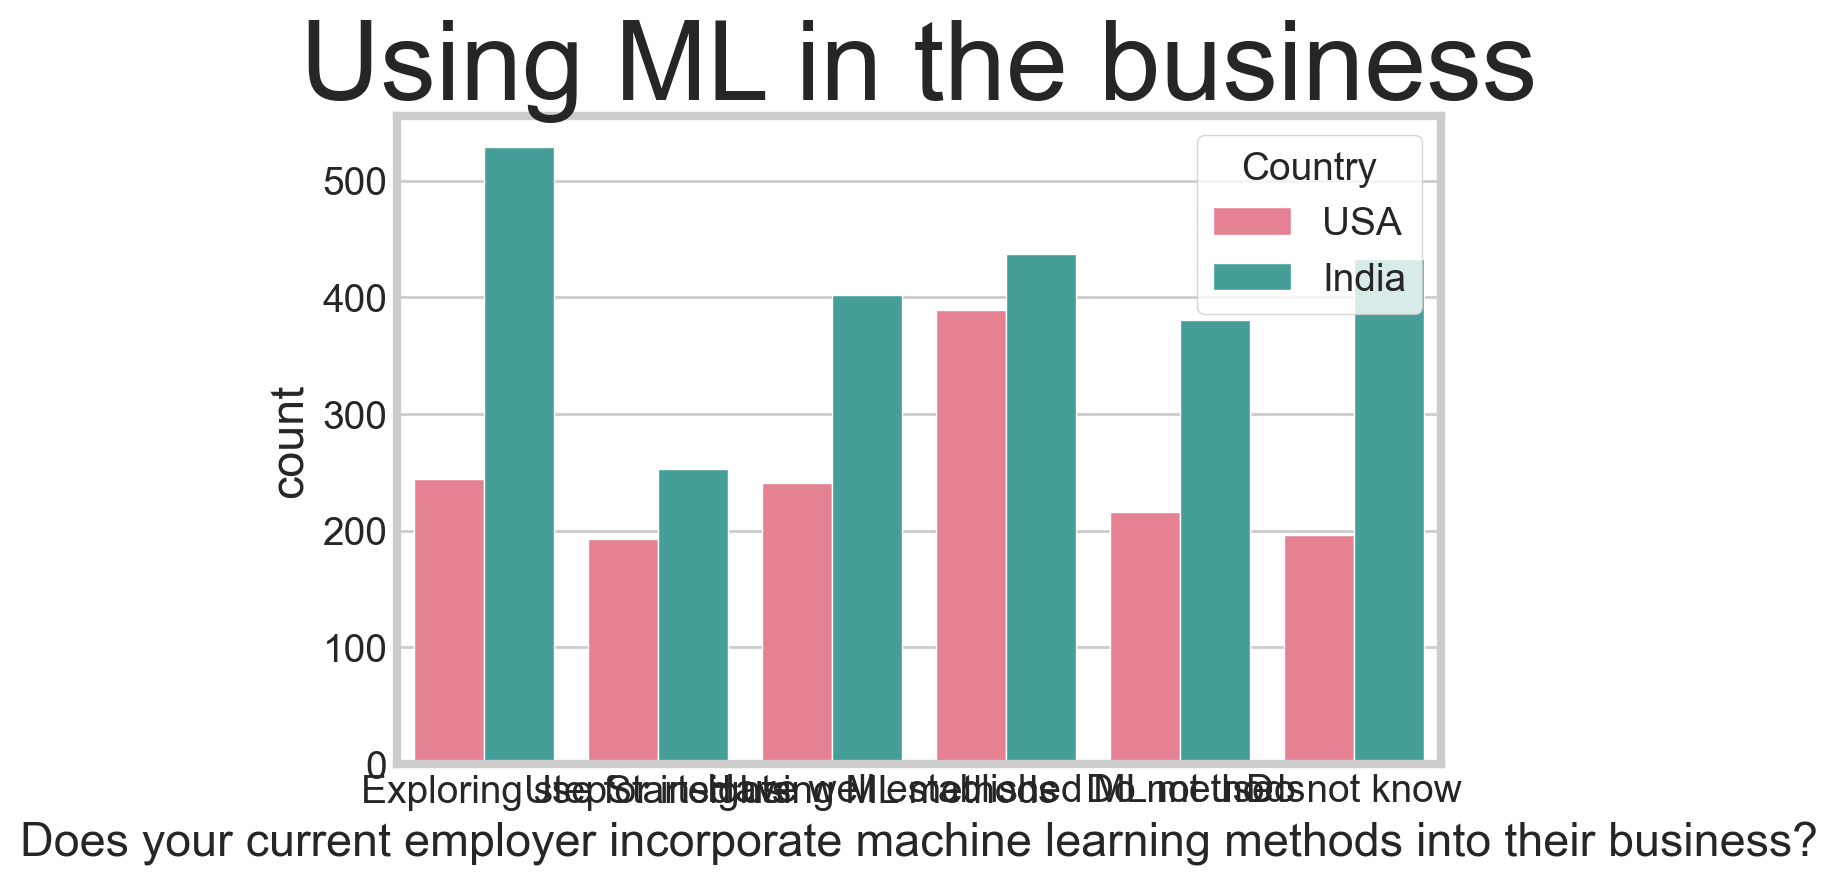

In [30]:
df[df.columns[109]].replace({'We are exploring ML methods (and may one day put a model into production)':'Exploring step',
                             'We use ML methods for generating insights (but do not put working models into production)':'Use for insights',
                             'We recently started using ML methods (i.e., models in production for less than 2 years)':'Started using ML methods',
                             'We have well established ML methods (i.e., models in production for more than 2 years)':'Have well established ML methods',
                             'No (we do not use ML methods)':'Do not use',
                             'I do not know':'Do not know'}, inplace=True)

sns.countplot(x = df.columns[109], hue = df.columns[3], data = df, palette = "husl",
             order = ['Exploring step','Use for insights','Started using ML methods','Have well established ML methods','Do not use','Do not know'])
plt.title('Using ML in the business', fontsize=40)